In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Homework 2

## 4 (A) Selecting a pair of stereo images

Take a pair of stereo images, one image, denoted as $S_L(x, y)$, is for the left eye, and one $S_R(x, y)$ for the right eye. Here $x$ and $y$ are the coordinates of the image pixel locations. For example $x = 1, 2, ..., 256$ and $y = 1, 2, ..., 256$. You may find some examples online, for example at this website https://www.londonstereo.com/3- D-gallery1.html. If the original images are colored, remove the color. Plot out the images, each as a luminance image.

In [2]:
left_original = imread("resources/eye1.png")
right_original = imread("resources/eye2.png")

In [3]:
def plot_left_and_right(left, right, apply_lim = False, title_left = "Left", title_right = "Right"):
    max_lim = np.max(np.abs([left, right]))
    
    plt.subplot(1, 2, 1)
    if apply_lim:
        plt.imshow(left, cmap = "gray", vmin = -max_lim, vmax = max_lim)
    else:
        plt.imshow(left, cmap = "gray")
    plt.colorbar(fraction = 0.046, pad = 0.04)

    if title_left != "":
        plt.title(title_left)
    
    plt.subplot(1, 2, 2)
    if apply_lim:
        plt.imshow(right, cmap = "gray", vmin = -max_lim, vmax = max_lim)
    else:
        plt.imshow(right, cmap = "gray")
    plt.colorbar(fraction = 0.046, pad = 0.04)
    
    if title_right != "":
        plt.title(title_right)
    
    plt.tight_layout()
    plt.show()

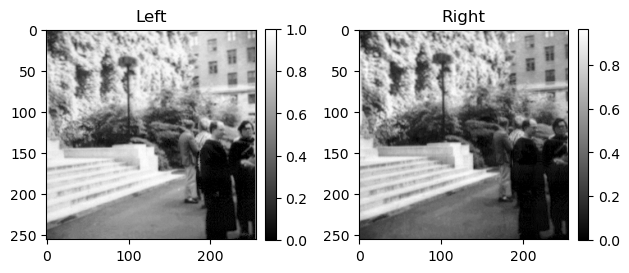

In [4]:
plot_left_and_right(left_original, right_original)

## 4 (B) Normalizing the images

Please normalize each image as follows. For $S_i(x, y)$, with $i = L$ or $i = R$, find $S_i^{min}$ and $S_i^{max}$ as the mininum and maximum of $S_i(x, y)$ across all pixel locations $(x, y)$. Then, for $\hat{S} = 255$, do

$$S_i(x, y) \rightarrow \hat{S} \frac{S_i(x, y) - S_i^{min}}{{S_i^{max} - S_i^{min}}$$

Now $0 \leq S_i(x, y) \leq \hat{S}$. Round each $S_i(x, y)$ into an integer value so that $S_i(x, y)$ is an integer between $0$ and $\hat{S}$.

In [5]:
def normalize(image, s_hat = 255):
    s_min = np.min(image)
    s_max = np.max(image)

    image = s_hat * (image - s_min) / (s_max - s_min)
    image = np.round(image)
    
    return image

In [6]:
left = normalize(left_original)
right = normalize(right_original)

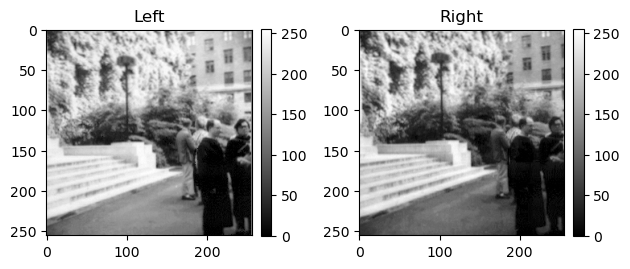

In [7]:
plot_left_and_right(left, right)

## 4 (C) Signal probability

For each $S_i(x, y)$, with $i = L$ or $i = R$, calculate the probability $P(S)$ for $S_i(x, y) = S$ across all $(x, y)$. This means, for each $S = 0, 1, 2, \dots, \hat{S}$, let $n(S)$ be the number of pixels $(x, y)$ for which $S_i(x, y) = S$, and let $N$ be the total number of pixels in $S_i$, then $P(S) = \frac{n(S)}{N}$.
Plot out $P(S)$ vs $S$ for each image $S_i$.

In [8]:
def probability(x, min_val = 0, max_val = 255):
    bins = np.linspace(min_val, max_val + 1, num = max_val + 2)
    return [ bins[:-1], np.histogram(x, bins = bins)[0] / np.size(x) ]

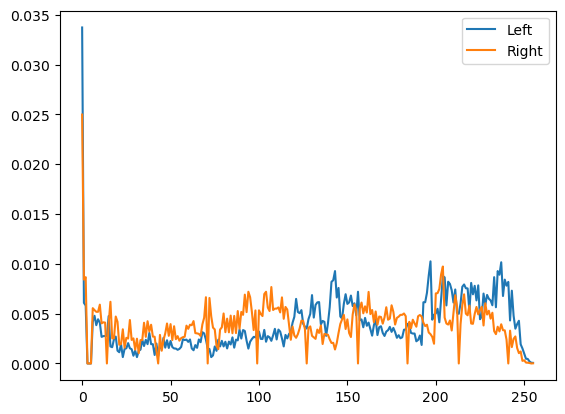

In [9]:
s, p = probability(left)
plt.plot(s, p, label = "Left")

s, p = probability(right)
plt.plot(s, p, label = "Right")

plt.legend()
plt.show()

## 4 (D) Signal entropy

For each $S_i(x, y)$, with $i = L$ or $i = R$, calculate the pixel entropy
$$H(S_i) = - \sum_{S_i} P(S_i)\ log_2\ P(S_i)$$

Please note that, if for some values $S$ you have $P(S) = 0$, in such a case $P(S)\ log_2\ P(S) = 0$. Your computer will complain if you try to calculate $log_2\ P(S)$ when $P(S) = 0$. So omit these $S$ values with zero $P(S)$ when doing the sum above.

Write out what $H(S)$ is for each image $S_i$.

In [10]:
def entropy(probs):
    return -np.sum([p * np.log2(p) if p > 0 else 0 for p in probs])

In [11]:
_, p = probability(left)
print(f"Entropy for i = L: {round(entropy(p), 2)}")

_, p = probability(right)
print(f"Entropy for i = R: {round(entropy(p), 2)}")

Entropy for i = L: 7.68
Entropy for i = R: 7.76


## 4 (E) Joint probability

Calculate the joint probability $P(S_1, S_2)$ of $S_L(x, y) = S_1$ and $S_R(x, y) = S_2$ for $S_1 = 0, 1, 2, \dots, \hat{S}$ and $S_2 = 0, 1, 2, \dots, \hat{S}$. This means, for each possible pair of values $(S_1, S_2)$, go across all pixels $(x, y)$ to find $n(S_1, S_2)$ as the number of pixels satisfying $S_L(x, y) = S_1$ and $S_R(x, y) = S_2$. Then $P(S_1, S_2) = \frac{n(S_1, S_2)}{N}$.
Plot out $P(S_1, S_2)$ (which is the joint probability distribution function) versus $S_1$ and $S_2$.

In [12]:
def joint_probability(x, y, min_val = 0, max_val = 255):
    counts = np.zeros(shape = (max_val - min_val + 1, max_val - min_val + 1))
    
    for i in range(0, max_val + 1):
        for j in range(0, max_val + 1):
            counts[i, j] = np.sum(np.logical_and(x == i, y == j))
    
    return counts / np.size(x)

In [13]:
probs = joint_probability(left, right)

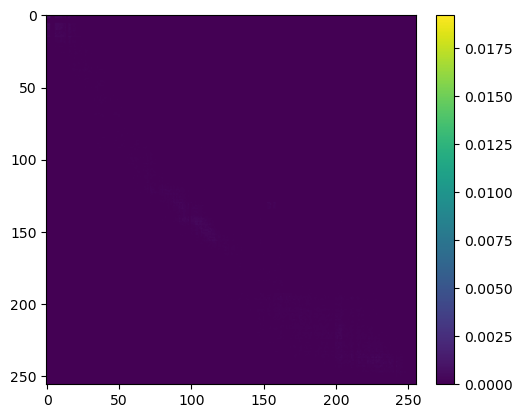

In [14]:
plt.imshow(probs)
plt.colorbar(fraction = 0.046, pad = 0.04)
plt.show()

## (F) Joint entropy

Calculate joint entropy as

$$H(S_1, S_2) = - \sum_{S_1, S_2} P(S_1, S_2)\ log_2\ P(S_1, S_2)$$

Write out the value for H(S_1, S_2).

In [15]:
print(f"Joint entropy: {round(entropy(probs.flatten()), 2)}")

Joint entropy: 13.72


## (G) Mutual information

Calculate mutual information between corresponding pixels in the two images as

$$I(S_1, S_2) = \sum_{S_1, S_2} P(S_1, S_2)\ log_2\ \frac{P(S_1, S_2)}{P(S_1)P(S_2)} = H(S_1) + H(S_2) - H(S_1, S_2)$$

Write out the value for $I(S_1, S_2)$.

In [16]:
def mutual_information(x, y, min_val = 0, max_val = 255):
    _, p = probability(x, min_val = min_val, max_val = max_val)
    entropy_x = entropy(p)

    _, p = probability(y, min_val = min_val, max_val = max_val)
    entropy_y = entropy(p)

    p = joint_probability(x, y, min_val = min_val, max_val = max_val)
    entropy_xy = entropy(p.flatten())
    
    return entropy_x + entropy_y - entropy_xy

In [17]:
print(f"Mutual information: {round(mutual_information(left, right), 2)}")

Mutual information: 1.73


## (H) Redundancy

Calculate the redundancy between the left and right eye images as

$$\text{Redundancy} = \frac{H(S_1) + H(S_2)}{H(S_1, S_2)} - 1$$

In [18]:
def redundancy(x, y, min_val = 0, max_val = 255):
    _, p = probability(x, min_val = min_val, max_val = max_val)
    entropy_x = entropy(p)

    _, p = probability(y, min_val = min_val, max_val = max_val)
    entropy_y = entropy(p)

    p = joint_probability(x, y, min_val = min_val, max_val = max_val)
    entropy_xy = entropy(p.flatten())
    
    return ((entropy_x + entropy_y) / entropy_xy) - 1

In [19]:
print(f"Redundancy: {round(redundancy(left, right), 2)}")

Redundancy: 0.13


## (I) Using $n$ bits to present each image pixel

So far, you have done (B)-(H) when the highest pixel value is $\hat{S} = 255$. Now, repeat (B)-(H) for $\hat{S} = 127, 63, 31, 15, 7, 3, 1$. In other words, you can take $\hat{S} = 2^n - 1$ for $n = 1, 2, 3, \dots, 8$ (so that $\hat{S} = 255$ when $n = 8$), so that you use $n$ bits to present each image pixel. Plot $H(S_i)$, $H(S_1, S_2)$, $I(S_1, S_2)$ and Redundancy as functions of $n$. Also, please plot out the two images for each $n$ value, and see if they make sense.

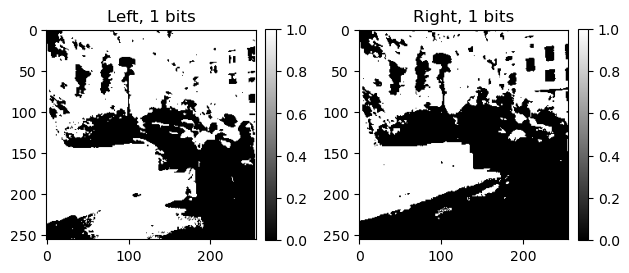

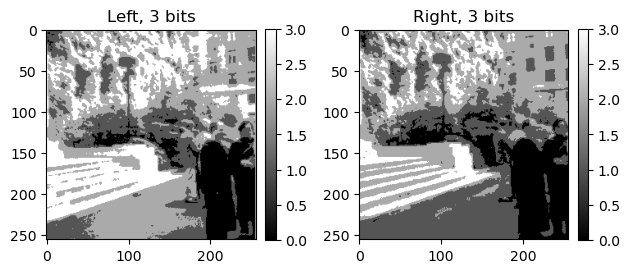

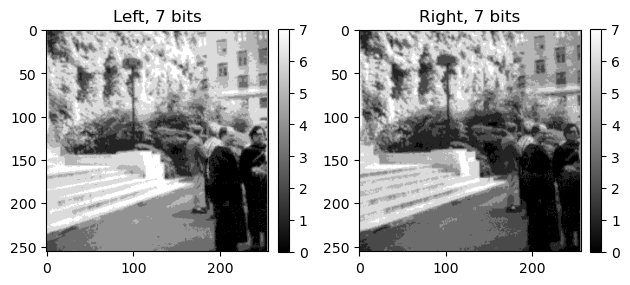

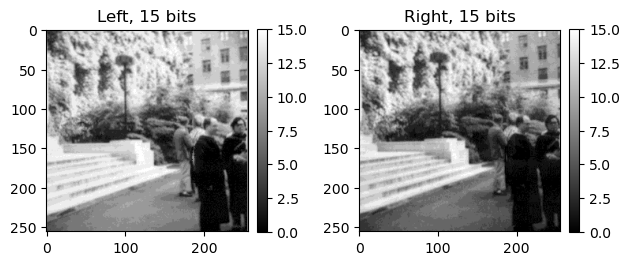

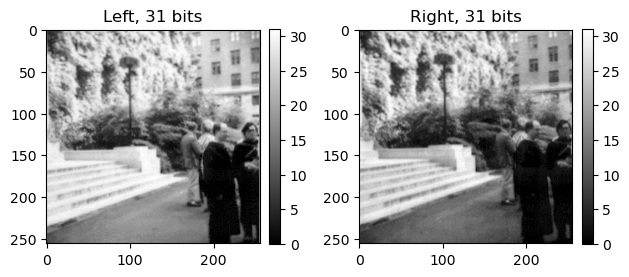

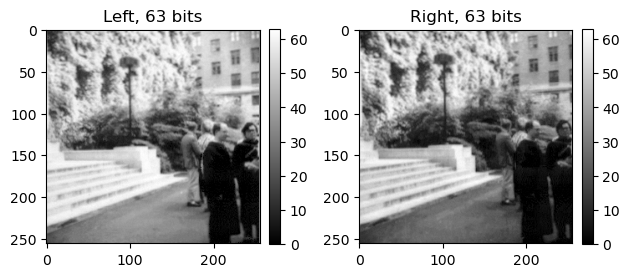

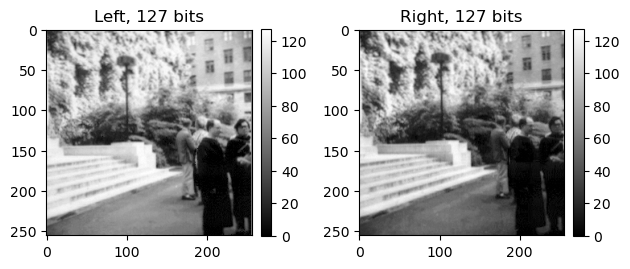

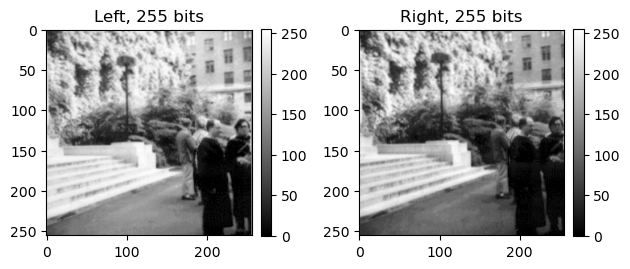

In [20]:
h_l = []
h_r = []
h_rl = []
i_rl = []
red = []
n_bits = []

for n_bit in range(1, 9):
    s_hat = round(math.pow(2, n_bit) - 1)
    n_bits.append(n_bit)
    
    _left = normalize(left_original, s_hat = s_hat)
    _right = normalize(right_original, s_hat = s_hat)

    plot_left_and_right(_left, _right, title_left = f"Left, {s_hat} bits", title_right = f"Right, {s_hat} bits")
    
    _, p = probability(_left, max_val = s_hat)
    h_l.append(entropy(p))

    _, p = probability(_right, max_val = s_hat)
    h_r.append(entropy(p))

    p = joint_probability(_left, _right, max_val = s_hat)
    h_rl.append(entropy(p.flatten()))
    
    i_rl.append(mutual_information(_left, _right))
    
    red.append(redundancy(_left, _right, max_val = s_hat))

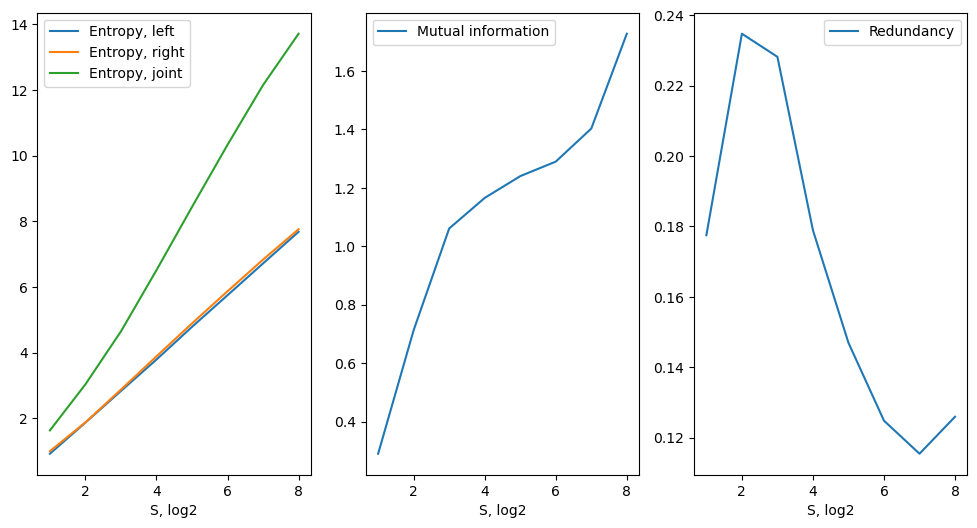

In [21]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 3, 1)
plt.plot(n_bits, h_l, label = "Entropy, left")
plt.plot(n_bits, h_r, label = "Entropy, right")
plt.plot(n_bits, h_rl, label = "Entropy, joint")
plt.legend()
plt.xlabel("S, log2")

plt.subplot(1, 3, 2)
plt.plot(n_bits, i_rl, label = "Mutual information")
plt.legend()
plt.xlabel("S, log2")

plt.subplot(1, 3, 3)
plt.plot(n_bits, red, label = "Redundancy")
plt.legend()
plt.xlabel("S, log2")
plt.show()

## (J) Correlation

Let us go back to take $\hat{S} = 255$, so that each $S(x, y)$ pixel is represented by 8 bits.
For each image $S(x, y)$, let

$$
\bar{S}_i = \sum_{x, y} \frac{S_i(x, y)}{N}
$$

be the average value of $S(x, y)$ across all the image pixels. Then shift the pixel value

$$
S_i(x, y) \rightarrow S_i(x, y) - \bar{S}_i
$$

so that each image should now have a zero mean value.

Now, the correlation between $S_i(x, y)$ and $S_j(x, y)$ across pixels is

\begin{equation*}
\begin{split}
R^S_{ij} &= \langle S_i S_j \rangle \\
&= \frac{\sum_{x, y} S_i(x, y) S_j(x, y)}{\sum_{x, y} 1} \\
&= \frac{\sum_{x, y} S_i(x, y) S_j(x, y)}{N}
\end{split}
\end{equation*}

So you can get a $2 \times 2$ matrix $R^S$ with elements $R_{ij}^S$ for $i = 1, 2$ and $j = 1, 2$.

$$
R^S = \begin{pmatrix}
R_{11}^S & R_{12}^S \\
R_{21}^S & R_{22}^S
\end{pmatrix}
$$

The diagonal element, $R_{11}^S$ and $R_{22}^S$ of this matrix are the variance of pixel values in each monocular image, and the off-diagonal values are the covariance between the two monocular images. Please write out this matrix value.

In [45]:
shifted_left = left - np.mean(left)
shifted_right = right - np.mean(right)
N = np.size(shifted_left)

In [48]:
r = np.array([
    [ np.sum(shifted_left * shifted_left) / N, np.sum(shifted_left * shifted_right) / N ],
    [ np.sum(shifted_right * shifted_left) / N, np.sum(shifted_right * shifted_right) / N ]
])

In [49]:
r

array([[5273.47167969, 4536.80761719],
       [4536.80761719, 5107.01367188]])